In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
IMAGES_NUMBER = 5
LEARNING_RATE = 0.1

In [ ]:
# image jako numpy array (50, 50)
def show_img(image):
  %matplotlib inline
  plt.imshow(image)
  plt.show()

In [ ]:
# image jako numpy array
def noise_img(image, procent):
  noised_image = np.copy(image)
  for i in range(int(image.shape[0] * procent * 0.01)):
    rand = np.random.randint(image.shape[0])
    noised_image[rand] = image[rand] * -1
  return noised_image

# Wczytanie danych uczących

In [ ]:
images = [ Image.open(f'{i}.png').convert('L') for i in range(IMAGES_NUMBER) ]

Dla sprawdzenia rysowanie jednego z obrazków

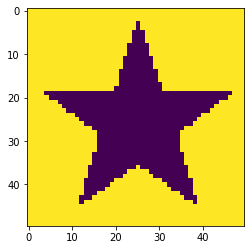

In [ ]:
show_img(images[2])

Konwersja obrazka do tablicy numpy

- wczytanie z pliku
- konwersja z RGB do szarego obrazku
- wpisanie do tablicy numpy i spłaszczenie tablicy dwywymiarowej
- zamiast przechowywania kolory, przechowanie informacji 1 dla piksela czarnego oraz -1 dla białego
- rozszerzenie wektora o dodatkowe jedynki, żeby wymiary dla theta były zgodne

In [ ]:
images = [ Image.open(f'{i}.png').convert('L') for i in range(IMAGES_NUMBER) ]
examples = [ np.where(np.asarray(images[i]).flatten() == 0, 1, -1) for i in range(IMAGES_NUMBER) ]
for i in range(IMAGES_NUMBER):
  examples[i] = np.append(examples[i], 1)
examples

[array([-1, -1, -1, ..., -1, -1,  1]),
 array([-1, -1, -1, ..., -1, -1,  1]),
 array([-1, -1, -1, ..., -1, -1,  1]),
 array([-1, -1, -1, ..., -1, -1,  1]),
 array([1, 1, 1, ..., 1, 1, 1])]

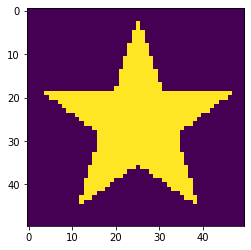

In [ ]:
show_img(examples[2][:-1].reshape(50, 50))

# Idea uczenia

`W` jest wektorem wag dla wszystkich perceptronów - każdy z 2500 perceptronów ma 2501 wag (dodana theta)

In [ ]:
W = np.random.rand(2500, 2501) # wagi perceptronów  
W

array([[0.78592191, 0.86583932, 0.77017289, ..., 0.34419206, 0.96513458,
        0.73448011],
       [0.24801509, 0.07055813, 0.66325719, ..., 0.21512223, 0.54950266,
        0.70213035],
       [0.94850098, 0.97054463, 0.54714868, ..., 0.19744153, 0.66939954,
        0.93074549],
       ...,
       [0.99047722, 0.28489013, 0.94318685, ..., 0.40456674, 0.68513863,
        0.08160546],
       [0.43075022, 0.10640149, 0.45938405, ..., 0.33533031, 0.5828127 ,
        0.78529234],
       [0.4731146 , 0.13553376, 0.91166565, ..., 0.15406402, 0.68525783,
        0.2364465 ]])

In [ ]:
W.shape

(2500, 2501)

In [ ]:
examples[0].shape

(2501,)

`Y` jest sumą (po wierszach) przemnożenia aktualnych wag przez wartości przykładów

In [ ]:
Y = np.dot(W, examples[0])
Y

array([-1128.27633228, -1123.5240616 , -1137.51244639, ...,
       -1107.79521164, -1127.47421475, -1087.76306652])

In [ ]:
Y.shape

(2500,)

`O` jest wynikiem działania funkcji aktywacji dla każdego z perceptronów

In [ ]:
O = np.where(Y > 0, 1, -1)
O

array([-1, -1, -1, ..., -1, -1, -1])

Obliczenie funkcji błędu dla każdego z perceptronów

In [ ]:
ERR = O - examples[0][:-1]
ERR

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
ERR.shape

(2500,)

`T` będzie wektorem, który odpowiada za uczenie - jeśli dla perceptronu `i`, `T[i] == 1` to perceptron uczy się poprawnie, w przeciwnym wypadku należy poprawić wagi

In [ ]:
T = np.zeros(2500)
T

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
T[ERR == 0] = 1
T

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
for i in range(2500):
  if(T[i] == 0):
    W[i][:-1] += LEARNING_RATE * ERR[i] * examples[0][:-1]
    W[i][2500] += LEARNING_RATE * ERR[i]

# Uczenie perceptronów

In [ ]:
W = np.random.rand(2500, 2501) # wagi perceptronów  

In [ ]:
for iterator in range(1000):                                                    # ile razy uczyć
  i = np.random.randint(0, IMAGES_NUMBER)                                       # dla każdego obrazka
  Y = np.dot(W, examples[i])                                                    # wynik funkcji sum(dot(wagi * przykład))
  O = np.where(Y > 0, 1, -1)                                                    # funkcja aktywacji
  ERR = examples[i][:-1] - O                                                    # bład dla poszczegolnych wartości
  # T = np.zeros(2500)                                                          
  # T[ERR == 0] = 1                                                             # tablica wyników - 1 poprawne, 0 niepoprawne
  for j in range(2500):                                                         # dla wszystkich perceptronów
    if ERR[j] != 0:                                                             # jesli błędny wynik
      W[j] += LEARNING_RATE * ERR[j] * examples[i]                              # zmień wagi

In [ ]:
W

array([[0.18345829, 0.75850894, 0.64496886, ..., 0.09571081, 0.79607021,
        0.53661767],
       [0.62871383, 0.1181707 , 0.00809449, ..., 0.64083987, 0.43588256,
        0.77725881],
       [0.04791216, 0.32880945, 0.96819479, ..., 0.72577151, 0.9115774 ,
        0.3327136 ],
       ...,
       [0.00918281, 0.39083052, 0.09445422, ..., 0.72893661, 0.23192019,
        0.7794196 ],
       [0.47759484, 0.4499491 , 0.62930394, ..., 0.77624173, 0.12833024,
        0.15153763],
       [0.7098273 , 0.27395473, 0.42777354, ..., 0.31688065, 0.27638179,
        0.60964171]])

# Test działania

Stworzenie zaszumionego obrazka

In [ ]:
noised_img = noise_img(examples[3][:-1], 30)
noised_img = np.append(noised_img, 1)
noised_img

array([ 1, -1, -1, ..., -1,  1,  1])

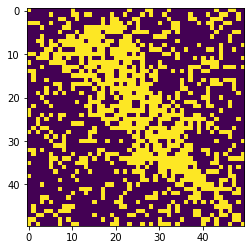

In [ ]:
show_img(noised_img[:-1].reshape(50, 50))

# Odszumianie krok po kroku



In [ ]:
Y_test = np.dot(W, noised_img)
Y_test

array([27.00899929, 26.46468364, 22.01200075, ..., 16.22464564,
        9.94446188,  8.49016502])

In [ ]:
O = np.where(Y_test > 0, 1, -1)
O.reshape(50, 50)

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ..., -1,  1,  1],
       ...,
       [ 1, -1,  1, ...,  1, -1,  1],
       [ 1, -1,  1, ..., -1,  1,  1],
       [ 1,  1, -1, ...,  1,  1,  1]])

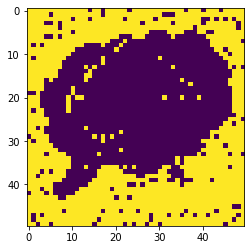

In [ ]:
show_img(O.reshape(50, 50))

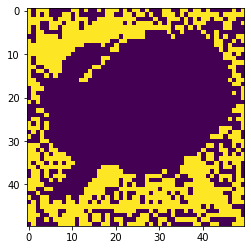

In [ ]:
Y_test2 = np.dot(W[:, :-1], O)
O2 = np.where(Y_test2 > 0, 1, -1)
show_img(O2.reshape(50, 50))

# Odszumianie

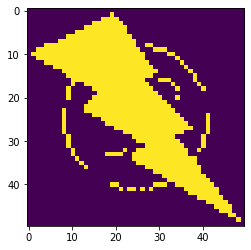

In [ ]:
noised_img[:-1] = np.where(np.dot(W, noised_img) > 0, 1, -1)
show_img(noised_img[:-1].reshape(50, 50))